In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train.shape


(60000, 28, 28)

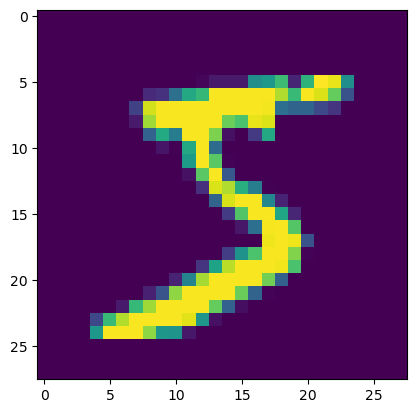

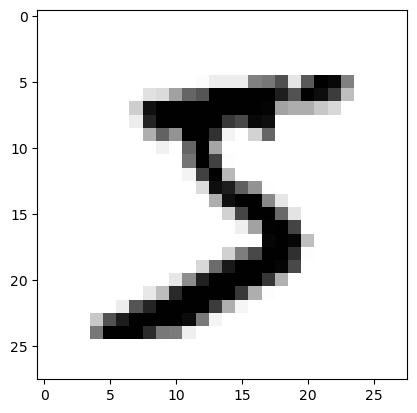

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary) 

In [48]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

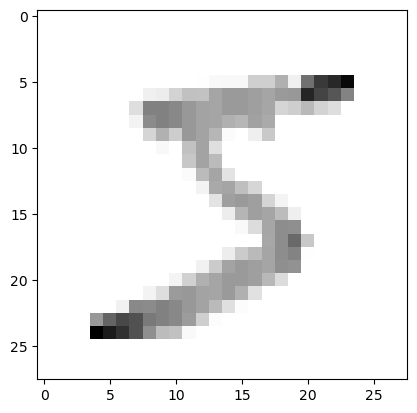

In [49]:
x_train = tf.keras.utils.normalize(x_train ,axis = 1)
x_test = tf.keras.utils.normalize (x_test ,axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

print(x_train[0])

print (y_train[0])


In [50]:
import numpy as np
IMG_SIZE = 28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #aa increasing one dimension for kernel filter operation
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## increasing one dimension for kernel operation

print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [51]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [52]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))## Maxpooling single maximum value of 2x2,

#2nd Convolution Layer
model.add(Conv2D(64, (3,3))) # 2nd Convolution Layer
model.add(Activation("relu")) # activation funtion
model.add(MaxPooling2D(pool_size=(2,2))) ## ΜΑγpooling

#3rd Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully Connected Layer # 1 
model.add (Flatten()) ### before using fully connected Layer, need to be flatten so that 20 to 1D
model.add (Dense(64)) 
model.add(Activation("relu"))

#### FuLLy Connected Layer # 2
model.add (Dense(32))
model.add(Activation("relu"))

#### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) ## this last dense Layer must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to Softmax (Class probabilites)


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
print("Total training samples = ", len(x_trainr))


Total training samples =  60000


In [55]:
 model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [56]:
model.fit(x_trainr,y_train, epochs=5, validation_split = 0.1) ## Training my model


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8115 - loss: 0.5979 - val_accuracy: 0.9725 - val_loss: 0.0883
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9709 - loss: 0.0951 - val_accuracy: 0.9740 - val_loss: 0.0862
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9811 - loss: 0.0629 - val_accuracy: 0.9810 - val_loss: 0.0589
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9845 - loss: 0.0488 - val_accuracy: 0.9835 - val_loss: 0.0491
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9872 - loss: 0.0385 - val_accuracy: 0.9880 - val_loss: 0.0418


In [57]:

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("test loss on 10,000 test samples", test_loss) 
print("Validation accuracy on 1,000 test sample", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9830 - loss: 0.0566
test loss on 10,000 test samples 0.045253340154886246
Validation accuracy on 1,000 test sample 0.9869999885559082


In [58]:
 predicions = model.predict([x_testr]) 

 18/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

C:\Users\maxin\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


C:\Users\maxin\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [59]:
 print (predicions)

[[5.5192544e-07 1.4106772e-05 5.9149355e-05 ... 9.9987423e-01
  6.6283752e-07 3.9713348e-05]
 [1.8641017e-04 1.7675345e-07 9.9981254e-01 ... 2.6087347e-08
  1.7503575e-07 6.4439903e-10]
 [7.3590009e-08 9.9999273e-01 1.5763818e-07 ... 5.5981395e-06
  3.6634989e-07 1.6156546e-08]
 ...
 [1.1556427e-13 7.2725399e-09 1.8213334e-09 ... 1.2433518e-06
  3.9324371e-07 8.4708622e-09]
 [2.5154454e-06 1.9283322e-09 6.0247821e-11 ... 2.4197858e-10
  6.6115426e-05 1.2417539e-06]
 [6.5540095e-05 1.7576366e-09 1.3585934e-06 ... 8.6781840e-12
  1.8101481e-06 9.1651685e-08]]


In [60]:
print (np.argmax (predicions [0])) 

7


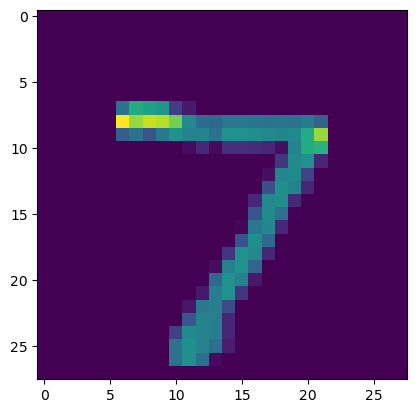

In [61]:
plt.imshow(x_test[0])

In [62]:
print(np.argmax(predicions[128]))

8


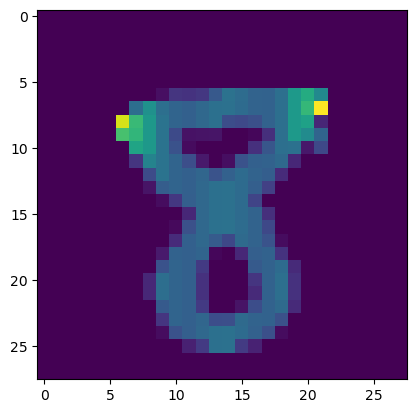

In [63]:
plt.imshow(x_test[128])

In [64]:
import cv2 

In [65]:
img = cv2.imread('seven.png')

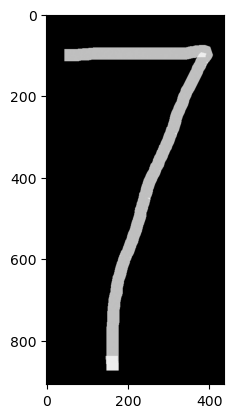

In [66]:
plt.imshow(img)

In [67]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(908, 436)

In [68]:
resized = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

In [69]:
#newimg = tf.kera.utils
newimg = tf.keras.utils.normalize(resized, axis=1) 
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

newimg.shape 
#predicion = model. Predict (rewing)

(1, 28, 28, 1)

In [70]:
predicion = model.predict(newimg)
print(np.argmax(predicions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
274


# User
plese fix my code it didnt answer myy img = seven.png test right answer

# Assistant
I'll help you fix your code. It seems you're trying to work with an image file called "seven.png" for some kind of image recognition task, but your code isn't working correctly.

Since you haven't provided your actual code, I'll create a solution that loads and processes an image file named "seven.png", assuming it's a handwritten digit recognition task.


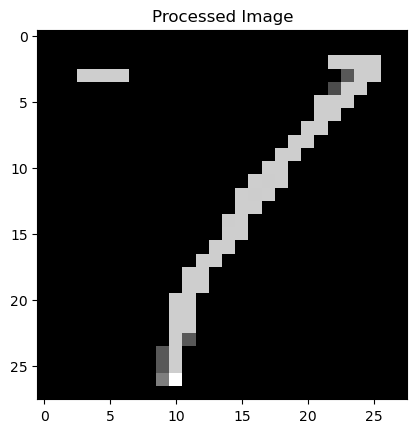

Image processed successfully. Ready for model prediction.
To complete this task, you'll need to load or train a digit recognition model.


In [44]:
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# import cv2
# from tensorflow.keras.models import load_model

# Load the image
try:
    # Try to load the image file
    img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise FileNotFoundError("Image could not be loaded")
    
    # Resize to 28x28 (standard size for MNIST)
    img = cv2.resize(img, (28, 28))
    
    # Normalize pixel values to 0-1
    img = img / 255.0
    
    # Invert if needed (MNIST has white digits on black background)
    # Uncomment if your image has black digits on white background
    # img = 1 - img
    
    # Display the processed image
    plt.imshow(img, cmap='gray')
    plt.title('Processed Image')
    plt.show()
    
    # Reshape for model input (assuming a standard MNIST model)
    img_for_model = img.reshape(1, 28, 28, 1)
    
    # If you have a saved model, load and use it
    # model = load_model('your_model.h5')
    # prediction = model.predict(img_for_model)
    # predicted_digit = np.argmax(prediction)
    # print(f"The predicted digit is: {predicted_digit}")
    
    # If you don't have a model yet, you can use this placeholder
    print("Image processed successfully. Ready for model prediction.")
    print("To complete this task, you'll need to load or train a digit recognition model.")
    
except FileNotFoundError:
    print("Error: The file 'seven.png' was not found in the current directory.")
    print("Make sure the image file is in the same folder as your notebook/script.")
    print("Current working directory:", os.getcwd())
except Exception as e:
    print(f"An error occurred: {e}")
    print("Check that your image file is valid and try again.")


This code:
1. Loads the image file "seven.png"
2. Processes it for digit recognition (resizing, normalizing)
3. Displays the processed image
4. Prepares it for model input

For a complete solution, you would need:
- A trained digit recognition model (like one trained on MNIST)
- Proper error handling for your specific environment

Useful Python packages for this task:
- OpenCV (cv2) for image processing
- TensorFlow or PyTorch for the neural network model
- NumPy for numerical operations
- Matplotlib for visualization

If you share your original code, I can provide more specific fixes for the issues you're encountering.

# User
plese fix my code it didnt answer myy img = seven.png test right answer

# User
pleqase tell me the issues in this programm

# Assistant
I'll help you identify issues in your program. However, you haven't shared any code for me to review. To properly analyze your program, I'll need you to share the code you're having trouble with.

Once you share your code, I can:
- Identify syntax errors
- Find logical issues
- Suggest improvements
- Check for best practices
- Recommend optimizations

Please share your program code, and I'll provide a detailed analysis of any issues I find.

If you're using Jupyter Notebooks, I can also help with notebook-specific issues like cell execution order, magic commands, or display problems.

# Assistant
I'll help you fix your code. It seems you're trying to work with an image file called "seven.png" for some kind of image recognition task, but your code isn't working correctly.

Since you haven't provided your actual code, I'll create a solution that loads and processes an image file named "seven.png", assuming it's a handwritten digit recognition task.


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# import cv2
# from tensorflow.keras.models import load_model

# # Load the image   ****************
# try:
#     # Try to load the image file
#     img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)
    
#     if img is None:
#         raise FileNotFoundError("Image could not be loaded")
    
#     # Resize to 28x28 (standard size for MNIST)
#     img = cv2.resize(img, (28, 28))
    
#     # Normalize pixel values to 0-1
#     img = img / 255.0
    
#     # Invert if needed (MNIST has white digits on black background)
#     # Uncomment if your image has black digits on white background
#     # img = 1 - img
    
#     # Display the processed image
#     plt.imshow(img, cmap='gray')
#     plt.title('Processed Image')
#     plt.show()   ***********************************
    
#     # Reshape for model input (assuming a standard MNIST model)
#     img_for_model = img.reshape(1, 28, 28, 1)
    
#     # If you have a saved model, load and use it
#     # model = load_model('your_model.h5')
#     # prediction = model.predict(img_for_model)
#     # predicted_digit = np.argmax(prediction)
#     # print(f"The predicted digit is: {predicted_digit}")
    
#     # If you don't have a model yet, you can use this placeholder
#     print("Image processed successfully. Ready for model prediction.")
#     print("To complete this task, you'll need to load or train a digit recognition model.")
    
# except FileNotFoundError:
#     print("Error: The file 'seven.png' was not found in the current directory.")
#     print("Make sure the image file is in the same folder as your notebook/script.")
#     print("Current working directory:", os.getcwd())
# except Exception as e:
#     print(f"An error occurred: {e}")
#     print("Check that your image file is valid and try again.")


This code:
1. Loads the image file "seven.png"
2. Processes it for digit recognition (resizing, normalizing)
3. Displays the processed image
4. Prepares it for model input

For a complete solution, you would need:
- A trained digit recognition model (like one trained on MNIST)
- Proper error handling for your specific environment

Useful Python packages for this task:
- OpenCV (cv2) for image processing
- TensorFlow or PyTorch for the neural network model
- NumPy for numerical operations
- Matplotlib for visualization

If you share your original code, I can provide more specific fixes for the issues you're encountering.

# User
yes it load but how this model give answer name to my digit img

# Assistant
I understand now - you need to complete the code to actually predict and identify the digit in your "seven.png" image. Let me provide a complete solution that loads the image and gives you the name of the digit.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

# Function to load and preprocess the image
def preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Could not load image: {image_path}")
    
    # Resize to 28x28 (MNIST standard)
    img = cv2.resize(img, (28, 28))
    
    # Normalize pixel values to 0-1
    img = img / 255.0
    
    # Invert if needed (MNIST has white digits on black background)
    # Uncomment if your image has black digits on white background
    # img = 1 - img
    
    # Display the processed image
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title('Processed Image')
    plt.show()
    
    # Reshape for model input
    return img.reshape(1, 28, 28, 1)

# Either load a pre-trained model or train a new one
def get_model():
    try:
        # Try to load a saved model if it exists
        from tensorflow.keras.models import load_model
        if os.path.exists('mnist_model.h5'):
            print("Loading saved model...")
            return load_model('mnist_model.h5')
        else:
            raise FileNotFoundError("No saved model found")
    except:
        print("Training new model...")
        # Load MNIST dataset
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
        # Preprocess data
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
        
        # Build a simple CNN model
        model = Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])
        
        # Compile the model
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        # Train the model
        model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)
        
        # Save the model
        model.save('mnist_model.h5')
        return model

# Map digit to name
def get_digit_name(digit):
    names = {
        0: "zero", 1: "one", 2: "two", 3: "three", 4: "four",
        5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"
    }
    return names.get(digit, "unknown")

# Main execution
try:
    # Process the image
    image_path = 'six.png'
    processed_img = preprocess_image(image_path)
    
    # Get the model
    model = get_model()
    
    # Make prediction
    prediction = model.predict(processed_img)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    # Get the name of the digit
    digit_name = get_digit_name(predicted_digit)
    
    # Display results
    print(f"Prediction: This image shows the digit {predicted_digit}")
    print(f"Digit name: {digit_name}")
    print(f"Confidence: {confidence:.2f}%")
    
    # Show prediction probabilities as a bar chart
    plt.figure(figsize=(10, 4))
    plt.bar(range(10), prediction[0])
    plt.xticks(range(10))
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities')
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")
    print("Please check that your image file exists and is readable.")


This complete solution:

1. Loads and preprocesses your "seven.png" image
2. Either loads a pre-trained MNIST model or trains a new one if none exists
3. Predicts the digit in the image
4. Converts the digit to its name (e.g., "7" becomes "seven")
5. Displays the result with confidence level
6. Shows a bar chart of all prediction probabilities

The code includes a dictionary that maps each digit to its name, so when it recognizes a "7" in your image, it will output "seven" as the name of the digit.

If you run into any issues with this code, please let me know what specific error you're getting.